### Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Business Goal

Since the want to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, the company wants —

To identify the variables affecting the demands with different features, e.g. yr, weather situation, season etc.

To create a linear model that quantitatively relates count e.i total number of bike rentals with variables such as yr, weather situation, season, etc.

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

### Step 1: Reading and Understanding the Data

We have been provided with `day` csv with 16 columns and Data dictionary to have a better understanding of the column names. 

In the dataset we see some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). 

+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
+ season : season (1: spring, 2: summer, 3: fall, 4: winter)


'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively.

+ yr : year (0: 2018, 1:2019)

In [546]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [547]:
# Read the given CSV file, and view some sample records
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [548]:
#Determining the number of rows and columns

bikes.shape

(730, 16)

In [549]:
# Summary of all the numeric columns in the dataset

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Data Cleaning and Manipulation

Let's clean the dataset provided by first removing columns with the most missing values or NA.

In [550]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Since the non-value is for present for all 730 entries, we can conclude that there is no missing values on the dataset. 

Let look into columns which do not contribute in further analysis

#### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed

1. instant: Is a record index, it won't contribute in further analysis.

2. dteday: This has the date, Since we already have separate columns 'yr' & 'mnth', it won't contribute in further analysis.

3. casual & registered: Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [551]:
bikes.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### According to dictionary provided, season, weathersit, mnth and weekday all have level 3 and above categorical values which needs to be mapped to its respective string values in order to classify categories better.

In [552]:
# Converting data type from int36 to category

for col in ['season', 'weathersit', 'mnth', 'weekday']:
    bikes[col] = bikes[col].astype('category')

In [553]:
# - season : season (1:spring, 2:summer, 3:fall, 4:winter)
# Mapping it to its respective categorical string

bikes['season'] = bikes['season'].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# - weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy - Good/Clear
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - Moderate/Misty
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - Bad/LightRain
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Worse/HeavyRain
# Mapping it to its respective categorical string

bikes['weathersit'] = bikes['weathersit'].map({1: "Good/Clear",2: 'Moderate/Misty',3: 'Bad/LightRain',4: 'Worst/HeavyRain'})


# - mnth : month ( 1 to 12)
# Mapping it to its respective categorical string

bikes['mnth'] = bikes['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


# - weekday : day of the week
# Mapping it to its respective categorical string

bikes['weekday'] = bikes['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [554]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Notice that all season, mnth, weekday and weathersit values have been replaced with it respective strings

### Step 3: Visualising the Data

Let's now try to visualize data to get a better understanding of the data. We need check for the below concerns 

- Multicollinearity
- Predictors having a strong association with the outcome variable

#### Identify Continuous and Categorical Features

In [555]:
# I can check the number of unique values is a column
# Categorical column
# Continuous

bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables, to visualise which variables are most correlated to the target variable 'cnt'.

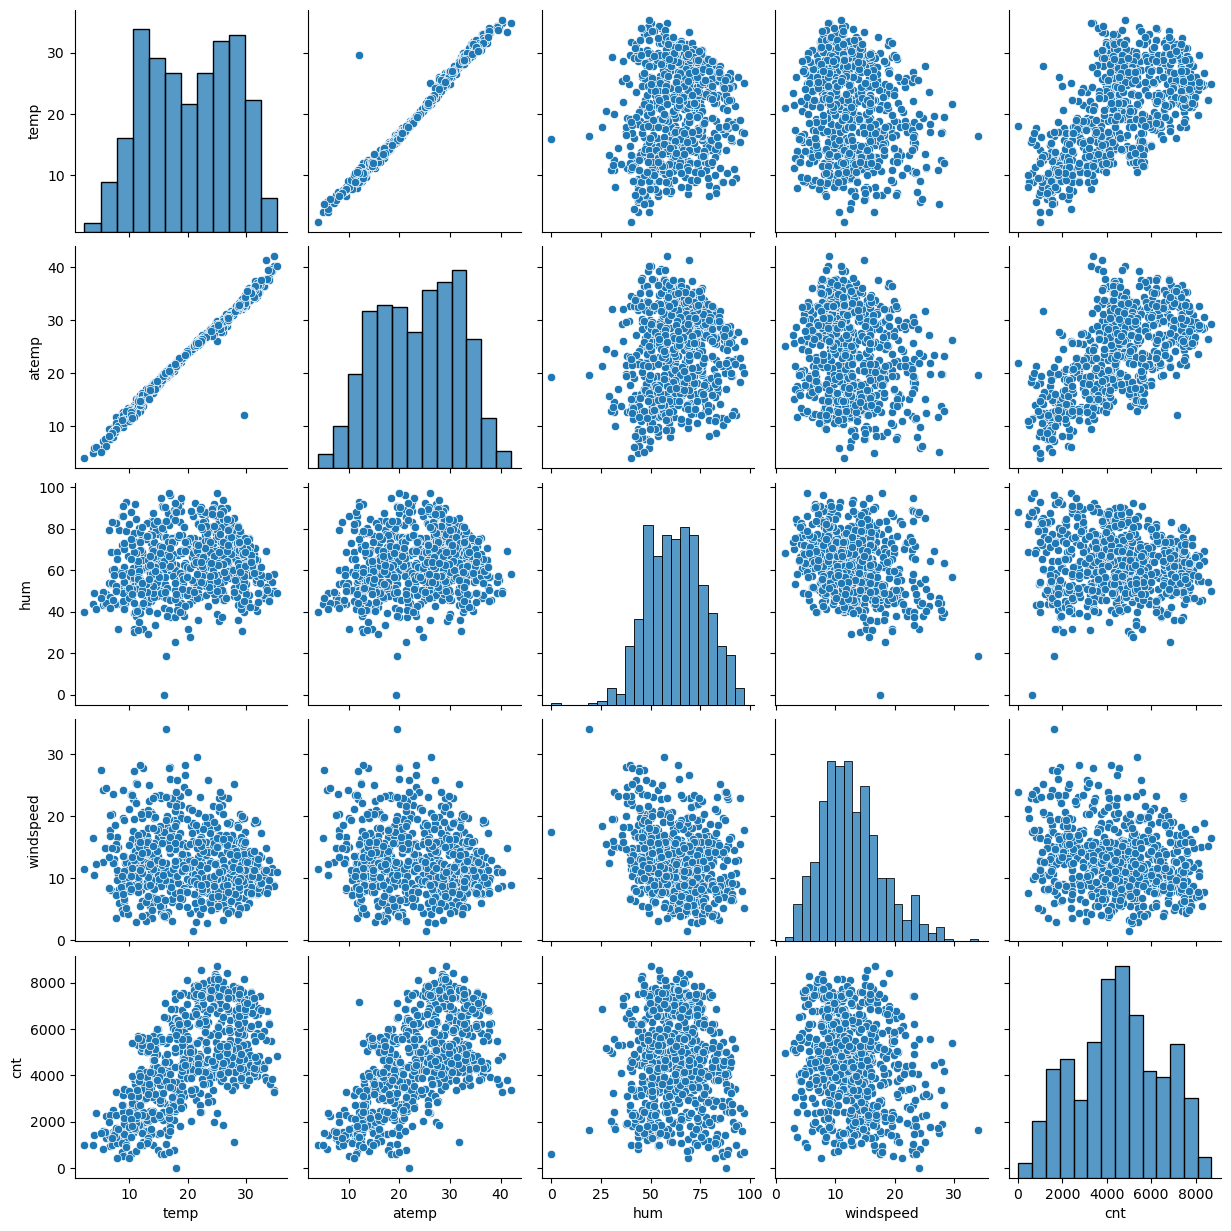

In [556]:
bikes_num = bikes[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bikes_num)
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation with bike rentals
- We can also say that there is a linear relationship between ***temp*** and ***atemp***

#### Visualising Categorical Variables

Let's make a boxplot for some of these variables.

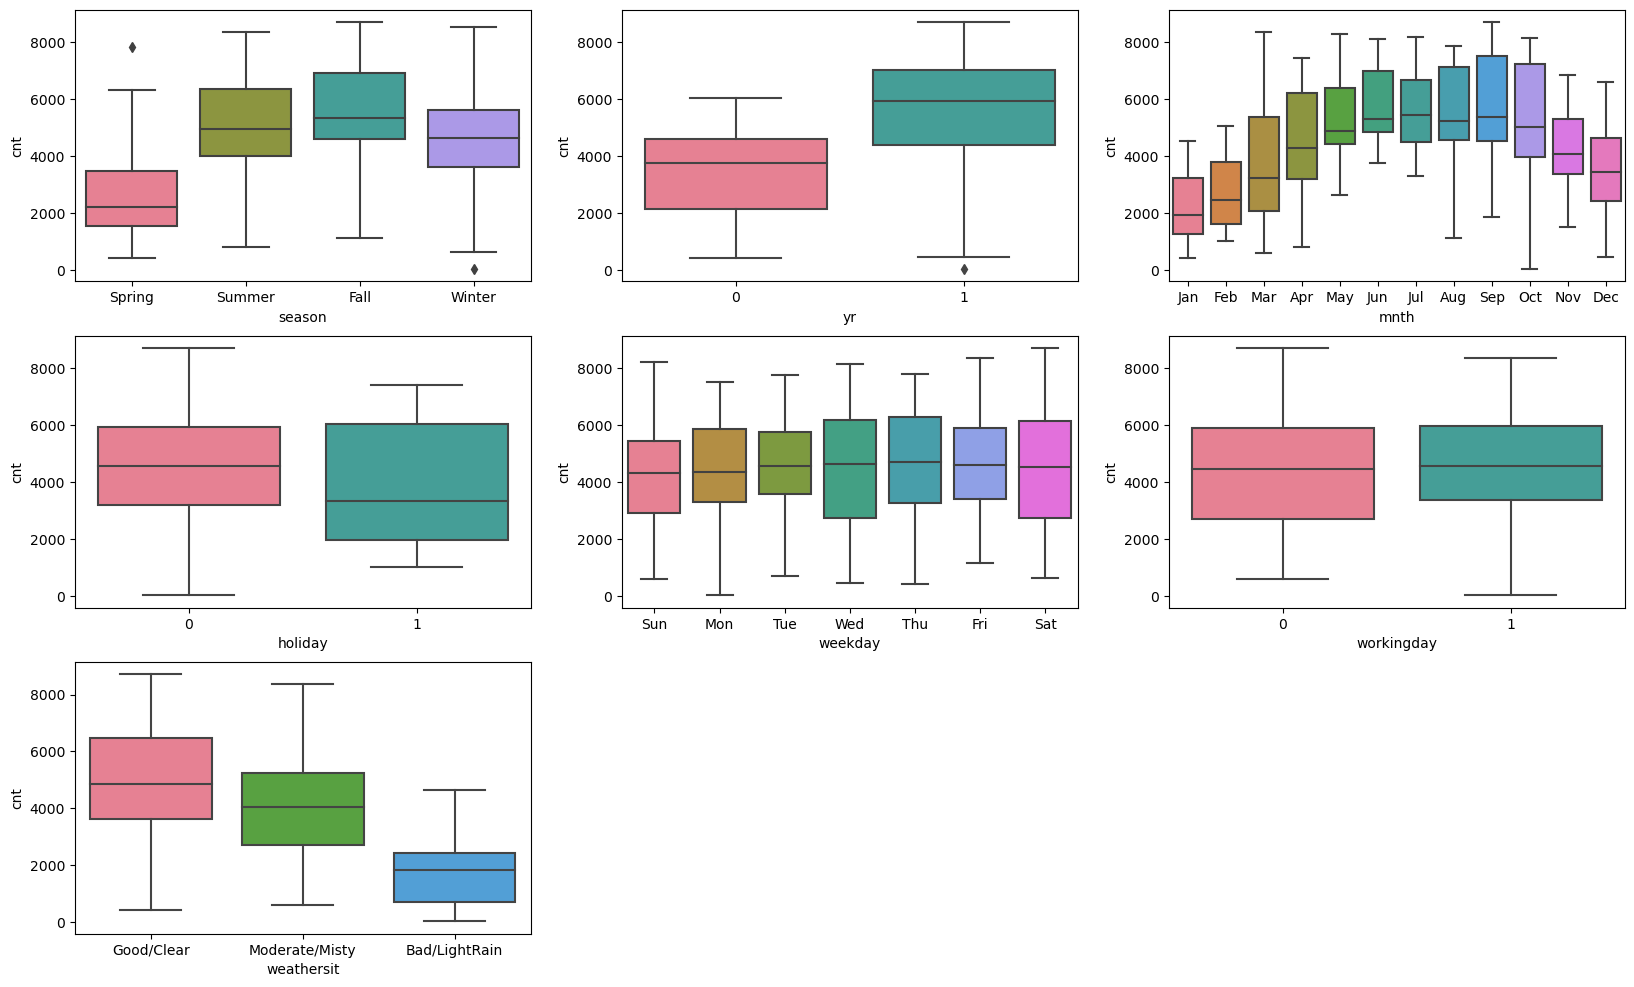

In [557]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes, palette="husl")
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes, palette="husl")
plt.show()

The plots above shows the relationship between categorical variables and a Target variable.

    - Increase in bike rentals during the Fall season and then in summer
    - Increase in bike rentals during the year 2019 compared to 2018
    - Increase in bike rentals on good and clear days
    - Increase in bike rentals on Wednesday, Saturday, and Thursday

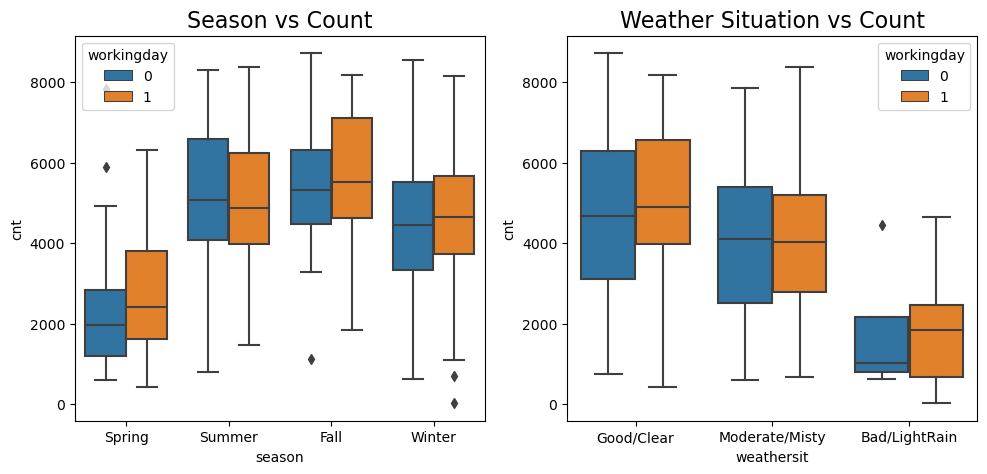

In [558]:
plt.figure(figsize = (18, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes, hue = 'workingday')
plt.title('Season vs Count', fontsize="16")
plt.subplot(1,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'workingday', data = bikes)
plt.title('Weather Situation vs Count', fontsize="16")
plt.show()

It is observed the highest number of bike rentals took place on ***Working days*** during ***Fall season*** and on a ***Good/Clear weather*** situation

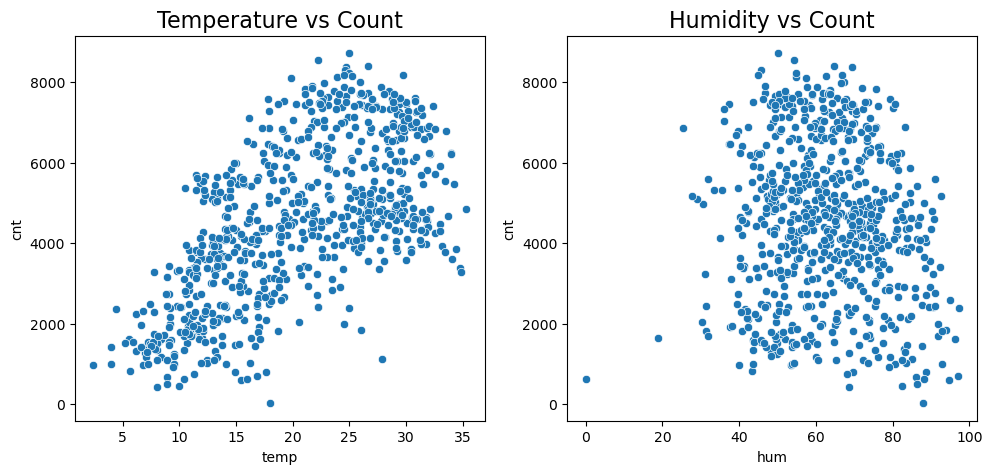

In [559]:
plt.figure(figsize = (18, 5))
plt.subplot(1,3,1)

#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=bikes)
plt.title('Temperature vs Count', fontsize="16")
plt.subplot(1,3,2)
#scatter plot for humidity to count
sns.scatterplot(x='hum', y='cnt',data=bikes)
plt.title('Humidity vs Count', fontsize="16")
plt.show()

It is observed the highest number of bike rentals took place on days with higher ***temperature*** and ***humidity***

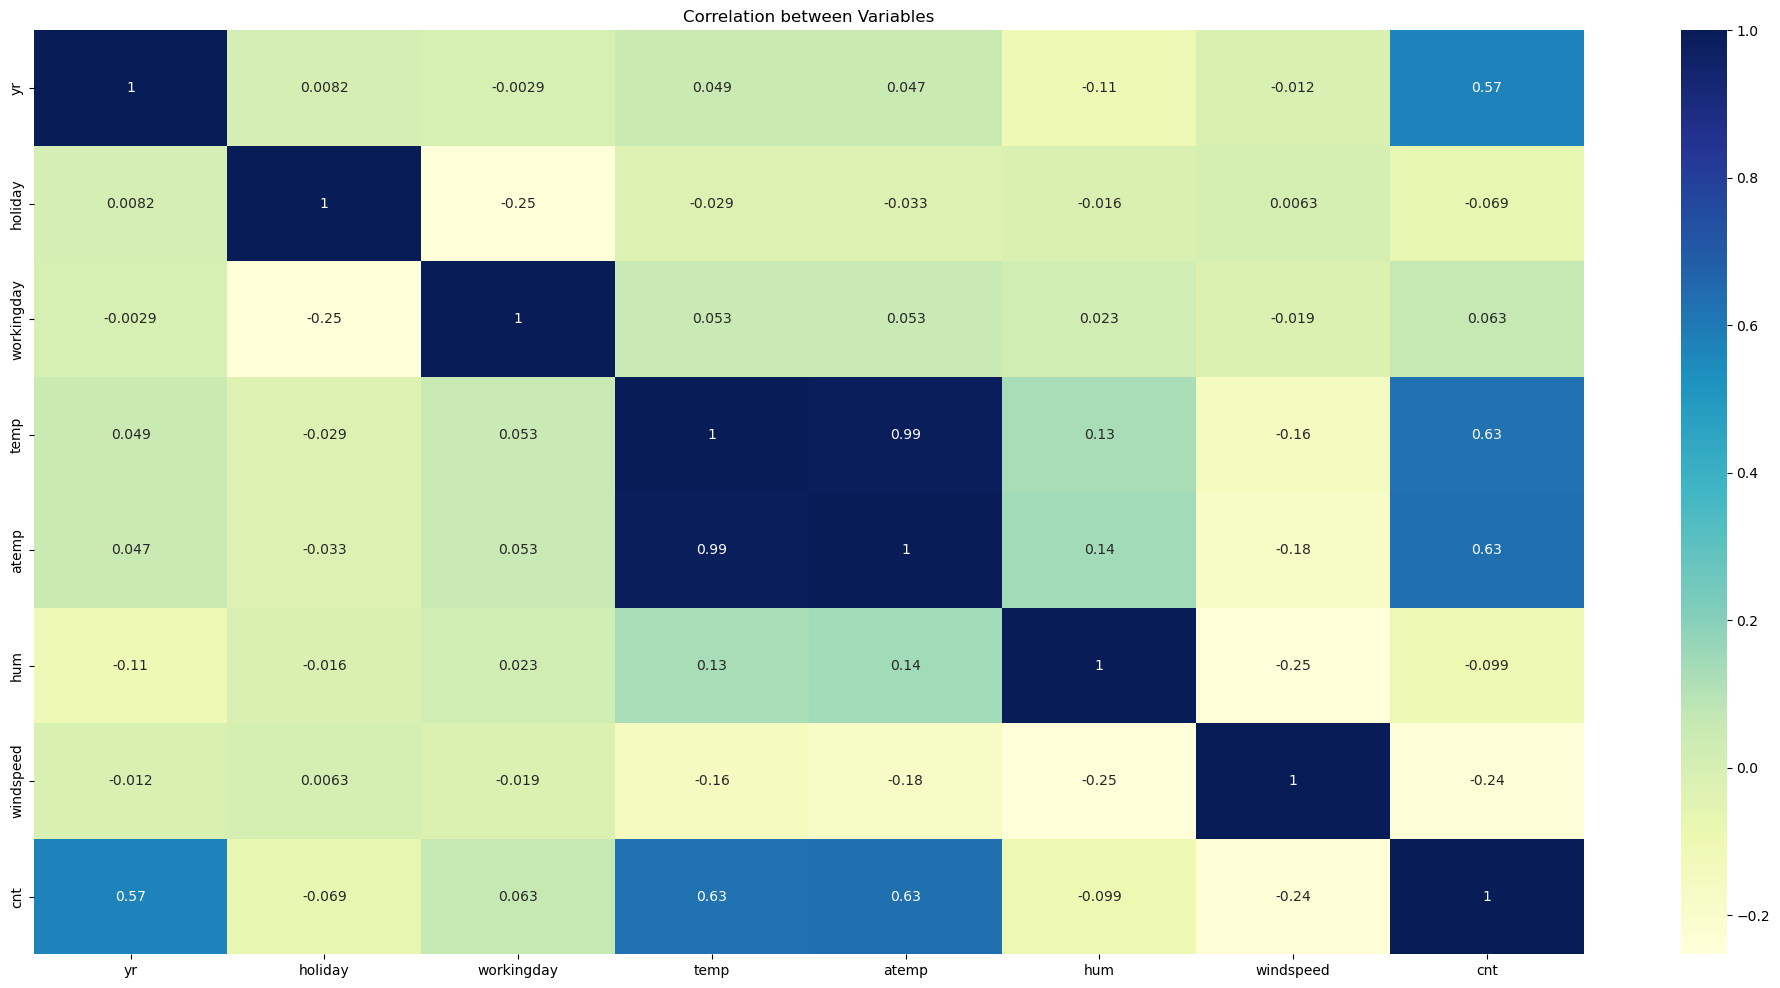

In [560]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 12))
sns.heatmap(bikes.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

As is visible from the pairplot and the heatmap, we can see temp, atemp, yr variables are correlated to 'cnt' variable

Both the plots above helps to interpret the data well, and identify the variables that can turn out to be useful in building the model

So yes we can consider a Linear Regression Model.

### Step 4: Data Preparation

- As you can see the dataset has many columns with values as strings. So in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s or values that could help us in scaling

#### Dummy variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'

The variable `season` has 4 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [561]:
# Get the dummy variables for the feature 'season', 'weekday', 'mnth', 'weathersit'
# Let's drop the first column by using 'drop_first = True'

months = pd.get_dummies(bikes['mnth'], drop_first=True)
weekdays = pd.get_dummies(bikes['weekday'], drop_first=True)
weather_sit = pd.get_dummies(bikes['weathersit'], drop_first=True)
seasons = pd.get_dummies(bikes['season'], drop_first=True)

In [562]:
# Add the results to the original bike dataframe
bikes = pd.concat([months,weekdays,weather_sit,seasons,bikes],axis=1)
bikes.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Sat,0,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Sun,0,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Mon,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Tue,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,Jan,0,Wed,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [563]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikes.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,Fall,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [564]:
bikes.shape

(730, 30)

### Step 5: Splitting the Data into Training and Testing Sets

Before model building, you first need to perform the test-train split and scale the features

In [565]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [566]:
# verify the columns and rows

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling the Features 

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

- There are two common ways of rescaling:

  - Min-Max scaling (Normalisation):Between 0 and 1
  - Standardisation :mean-0, sigma-1

Here we can see that except for `cnt`,`hum`,`temp`,`atemp`,`windspeed` all the other columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. Here we will use ***MinMax*** scaling.

In [567]:
scaler = MinMaxScaler()

In [568]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Checking values after scaling
df_train.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,Fall,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [569]:
# checking all columns and all the variables after scaling

df_train.describe()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,Fall,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,...,0.262745,0.247059,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,...,0.440557,0.431725,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we have scaled we can see all the numeric variables are now mapped between 0 and 1

Before start the training process we will plot a heat map to check multicollinearity

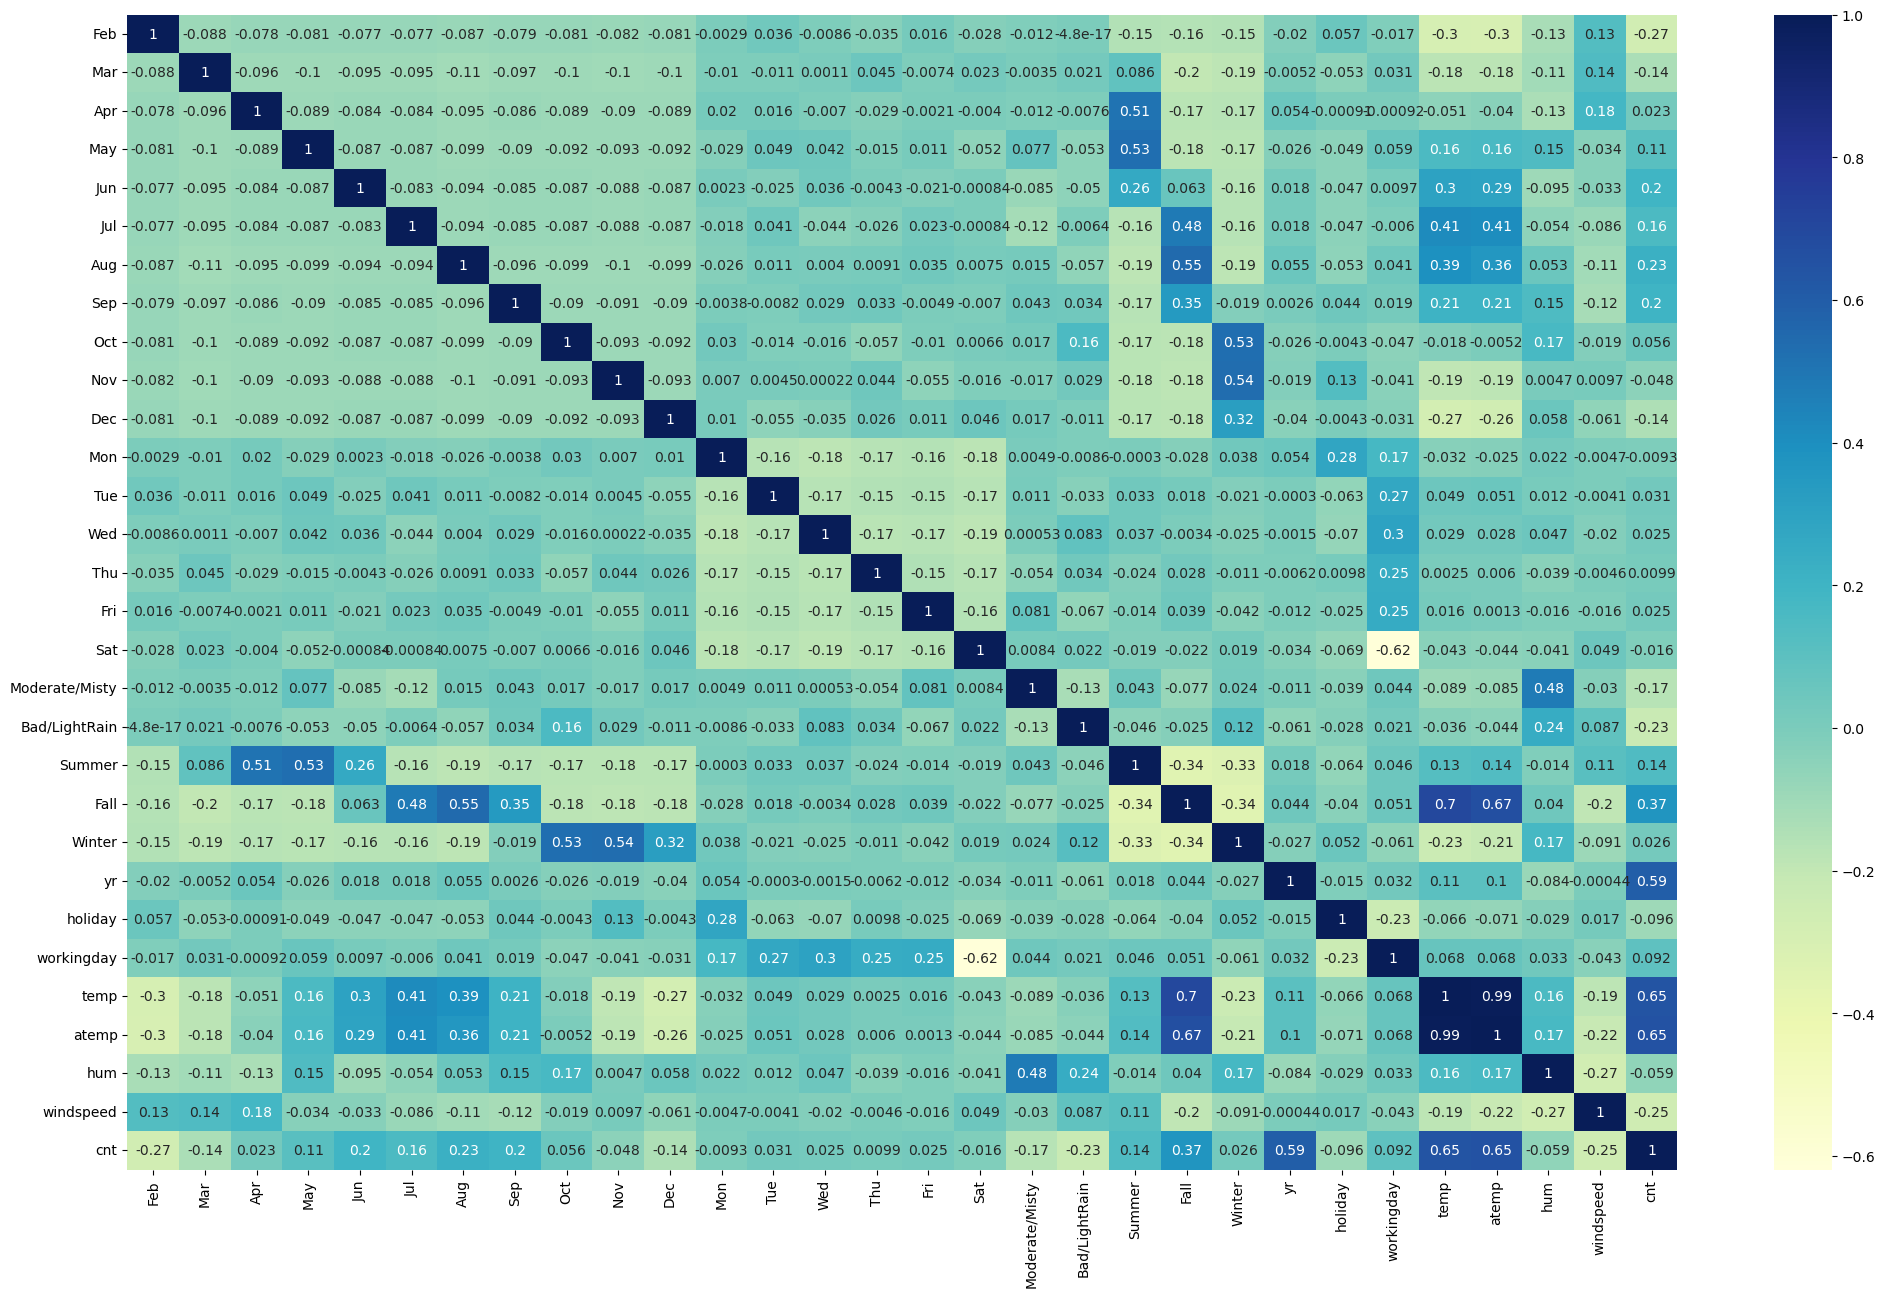

In [570]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
# Little to no multicollinearity among predictors

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- We can see that `temp`, `fall`, `year`, `summer`, `season`, `June to October` months are in good correlation with the `cnt` variable. And seem to have good influence on the number of bike rentals.
- We will refer this map while building the linear model to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.
- We can see multicollinearity among weekdays i.e `Monday` to `Saturday`. As most of variables might be interrelated, due to which the presence of that variable in the model is redundant.

### Step 6: Model Building

#### Dividing into X and Y sets for the model building

In [571]:
# Dividing training set into X_train and y_train sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


Here are some functions that will be used to build models using `statsmodels`

In [572]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    # Adding a constant variable
    X_train_model = sm.add_constant(X_train[cols])
    # Running the linear model 
    lr = sm.OLS(y_train, X_train_model).fit()
    print(lr.summary())
    return X_train_model, lr

##### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [573]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    X_train_model = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train_model.columns
    vif['VIF'] = [variance_inflation_factor(X_train_model.values, i) for i in range(X_train_model.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [574]:
cols = list(X_train)
cols

['Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Moderate/Misty',
 'Bad/LightRain',
 'Summer',
 'Fall',
 'Winter',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed']

### Model 1 with all variables

In [575]:
# Build model which prints summary and get VIF value
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          2.81e-180
Time:                        20:18:03   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1758      0.030      5.

##### Since VIF value for weekdays is `inf` and p-value for `Thursday` is very high, we will drop this variable.

        - When the value of VIF is infinite it shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R-squared (R2) =1, which lead to 1/ (1-R2) infinity. To solve this, we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

### Model 2

In [576]:
# Since VIF for weekdays is inf and p-value for Thursday is very high, we will drop this variable
cols = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Mon','Tue','Wed',
        'Fri','Sat','Moderate/Misty','Bad/LightRain','Summer','Fall','Winter',
        'yr','holiday','workingday','temp','atemp','hum','windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          2.81e-180
Time:                        20:18:09   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1758      0.030      5.

#### After dropping Thursday has significantly reduced the VIF value.


###  Build a Model using RFE
Recursive feature elimination 
We will be use the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [577]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train[cols], y_train)

# rfe = RFE(lm, 15)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train[cols], y_train)

In [578]:
#creating a list of features selected by RFE

list(zip(X_train[cols].columns,rfe.support_,rfe.ranking_))

[('Feb', False, 7),
 ('Mar', False, 2),
 ('Apr', False, 4),
 ('May', False, 3),
 ('Jun', False, 5),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Fri', False, 13),
 ('Sat', True, 1),
 ('Moderate/Misty', True, 1),
 ('Bad/LightRain', True, 1),
 ('Summer', True, 1),
 ('Fall', True, 1),
 ('Winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [579]:
X_train[cols].columns[rfe.support_]

Index(['Aug', 'Sep', 'Oct', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
       'Fall', 'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [580]:
X_train[cols].columns[~rfe.support_]

Index(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Mon', 'Tue',
       'Wed', 'Fri', 'atemp'],
      dtype='object')

### Model 3 using RFE selected features

In [581]:
cols = ['Aug', 'Sep', 'Oct', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
       'Fall', 'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          5.17e-191
Time:                        20:18:26   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1952      0.029      6.

##### Since `Fall` has high p value of `0.179` and VIF of `8.19`, it could be insignificant in our analysis. Hence we can drop this.

### Model 4

In [582]:
cols = ['Aug', 'Sep', 'Oct', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          8.70e-192
Time:                        20:18:41   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1948      0.029      6.

##### Since `holiday` has high p value of `0.038` and VIF of `1.16` , we can say that it is insignificant and can be dropped from further analysis

### Model 5

In [583]:
cols = ['Aug', 'Sep', 'Oct', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday', 'temp', 'hum',
       'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          4.92e-192
Time:                        20:18:52   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1850      0.028      6.

##### Dropping `Oct` because of high p-value of `0.014`. Hence is insignificant and can be dropped from futher analysis

### Model 6

In [584]:
cols = ['Aug', 'Sep', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday', 'temp', 'hum',
       'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          4.37e-192
Time:                        20:19:02   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1780      0.028      6.

##### Dropping `hum` because of high VIF value of `16.05`. Hence is insignificant and can be dropped from futher analysis

### Model 7

In [585]:
cols = ['Aug', 'Sep', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday', 'temp', 'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          4.31e-189
Time:                        20:19:12   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0809      0.019      4.

##### From Model 7 summary we can see the `temp` has the highest VIF value of `6.10`. Hence lets try dropping `temp`

### Model 8

In [586]:
cols = ['Aug', 'Sep', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday','windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     93.15
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          2.31e-107
Time:                        20:19:24   Log-Likelihood:                 307.46
No. Observations:                 510   AIC:                            -592.9
Df Residuals:                     499   BIC:                            -546.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3546      0.021     16.

#### From the model 8 summary we can see that there is a significant decrease in the R-square value from `83.8` to `65.1`. Hence its best that we retain `temp`. So this wont be a good model.

#### Lets try to drop `Aug` instead since it has a slightly high p-value in model 7 

### Model 9

In [587]:
cols = ['Sep', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday', 'temp', 'windspeed']

X_train_model,lr = build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          3.13e-188
Time:                        20:19:59   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

#### Conclusion

Now we can see we have our model `lr` which follows common heuristic for the VIF values.
The p values represent the significance of the variables and VIF which represent how variables are correlated to each other.

F-statistic has a value of `253.0` which is a high value, the Prob(F-statistic) is `3.13e-188` which is a practically zero value. Hence, the value of less than 0.05 which means that the overall model fit is significant.

Since both VIFs and p-values both are within an acceptable range we can go ahead and make our predictions using this model only.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of `0.835` or `83.5%`

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around `0.832` or `83.2%`

#### In order to make our model acceptable, we had to drop various features like `Thur`, `holiday`, `Oct`, `hum`, `Aug` and `Fall` variables from the RFE support columns

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [596]:
X_train_model

,const,Sep,Sat,Moderate/Misty,Bad/LightRain,Summer,Winter,yr,workingday,temp,windspeed
576,1.0,0,0,0,0,0,0,1,1,0.815169,0.264686
426,1.0,0,1,1,0,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,0,0,0,1,0,0.245101,0.663106
482,1.0,0,1,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,1,0,1,0,0,1,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,1,0.863973,0.187140
53,1.0,0,0,0,0,0,0,0,1,0.202618,0.111379
350,1.0,0,1,1,0,0,1,0,0,0.248216,0.431816
79,1.0,0,0,1,0,1,0,0,1,0.462664,0.529881


In [597]:
#y train predicted
y_train_pred = lr.predict(X_train_model)

### Normality of Residuals

Text(0.5, 0, 'Errors')

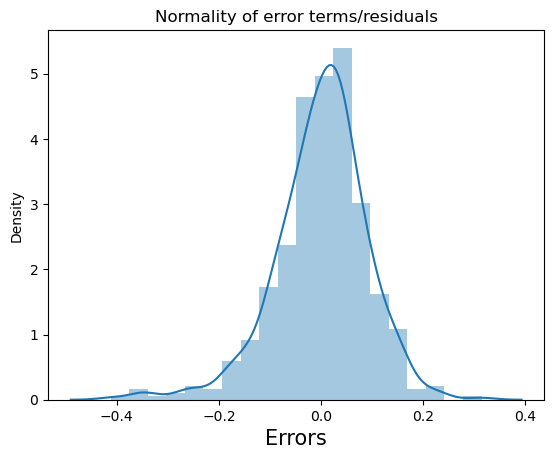

In [599]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Normality of error terms/residuals')               # Plot heading 
plt.xlabel('Errors', fontsize = 15) 

##### Residual = actual y value − predicted y value. Having a negative residual means that the predicted value is too high, similarly, if you have a positive residual, it means that the predicted value was too low. The aim of a regression line is to minimize the sum of residuals. We can see error terms are normally distributed

### Multicollinearity

In [600]:
get_vif(cols)

         Features   VIF
8            temp  4.76
7      workingday  4.04
9       windspeed  3.44
6              yr  2.02
1             Sat  1.69
4          Summer  1.57
2  Moderate/Misty  1.53
5          Winter  1.40
0             Sep  1.20
3   Bad/LightRain  1.08


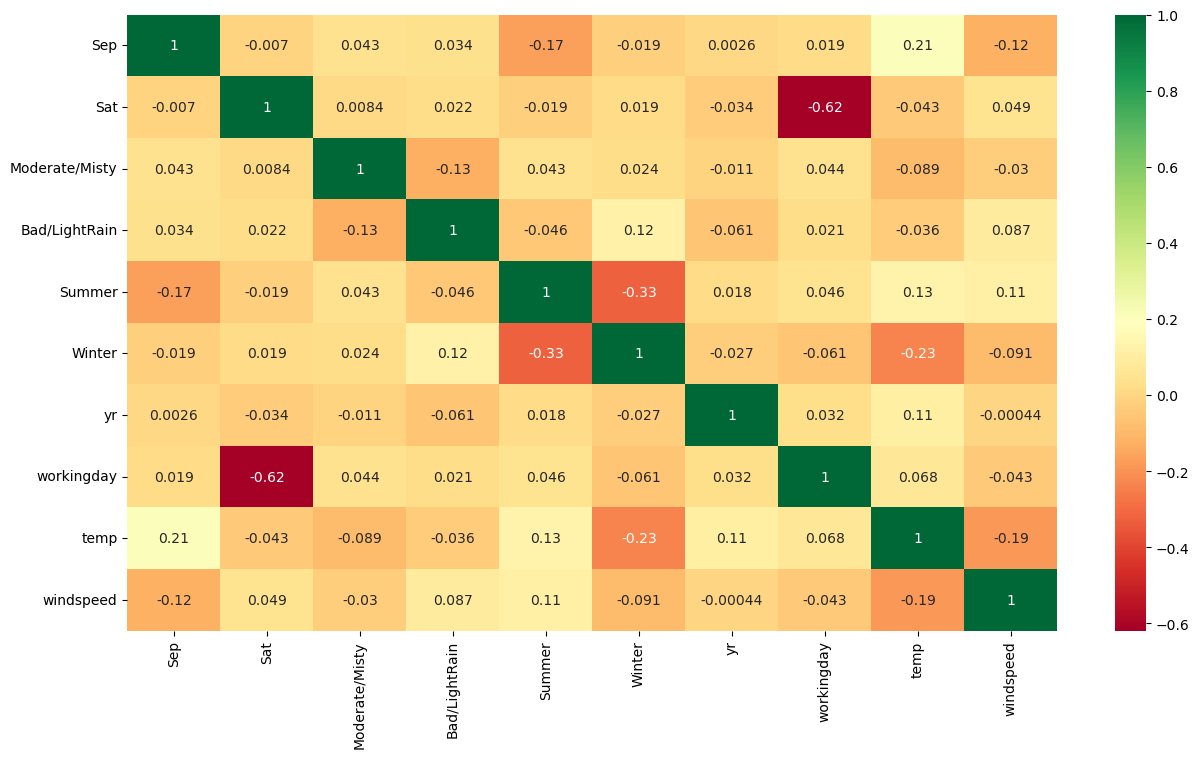

In [601]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train[cols].corr(),annot = True, cmap="RdYlGn")
plt.show()

##### VIF values are less than 5 which is good and also there is no multicollinearity as seen from the heatmap.

### Linearity

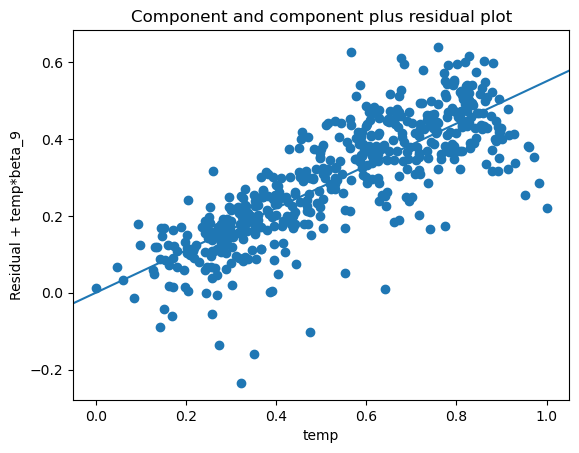

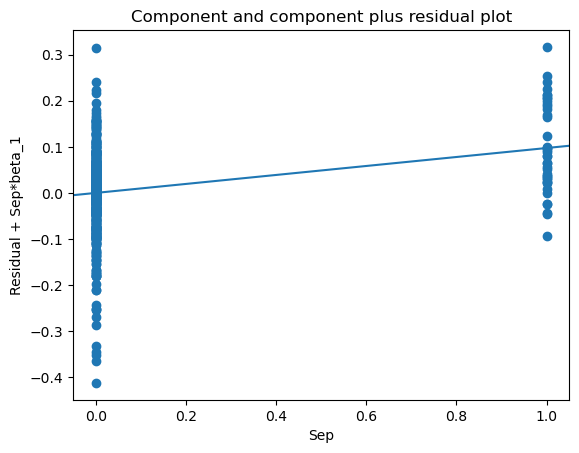

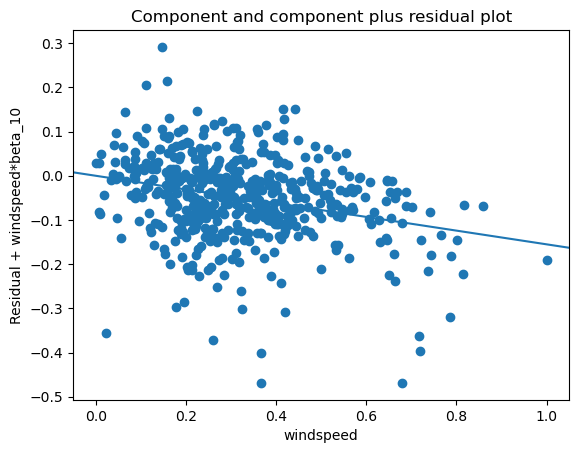

In [602]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

##### Linearity can be observed from above visualizations.

### Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

If there is a definite pattern obtained from the scatter plot then heteroscedasticity is present.

Text(0.5, 1.0, 'Residuals vs fitted values plot')

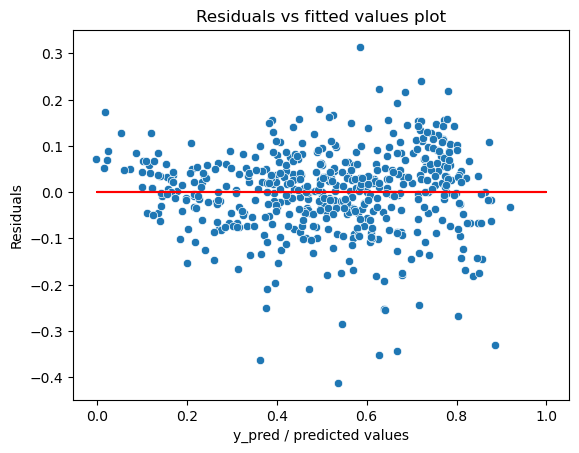

In [603]:
residuals = y_train - y_train_pred

sns.scatterplot(x=y_train_pred,y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot')

##### The residuals are spread uniformly, which holds the assumption of homoscedasticity. Also no visible pattern were observed from above plot for residuals.

### Independence of residuals

`Durbin – Watson (DW) statistic`

The value must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.


##### `Durbin-Watson` value of final model lr is `2.089`, which signifies there is no autocorrelation.

In [604]:
#Print R-squared value of train data set
r2_score(y_train, y_train_pred)

0.8352749595695672

##### R-Square value is same as obtained from our final model which was `83.5%`

### Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 9th model.

In [605]:
#Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,Fall,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [606]:
df_test.describe()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,...,Fall,Winter,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,...,0.245455,0.236364,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,...,0.431338,0.425817,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Dividing into X_test and y_test

In [607]:
#Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [608]:
# Taking final set of columns from model 9
col1 = X_train[cols].columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [609]:
# Making predictions
y_test_pred = lr.predict(X_test_lm)

### Finding R-squared and Adjusted R-Squared for Test set

In [610]:
#Print R-squared Value
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7961

### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

<Figure size 640x480 with 0 Axes>

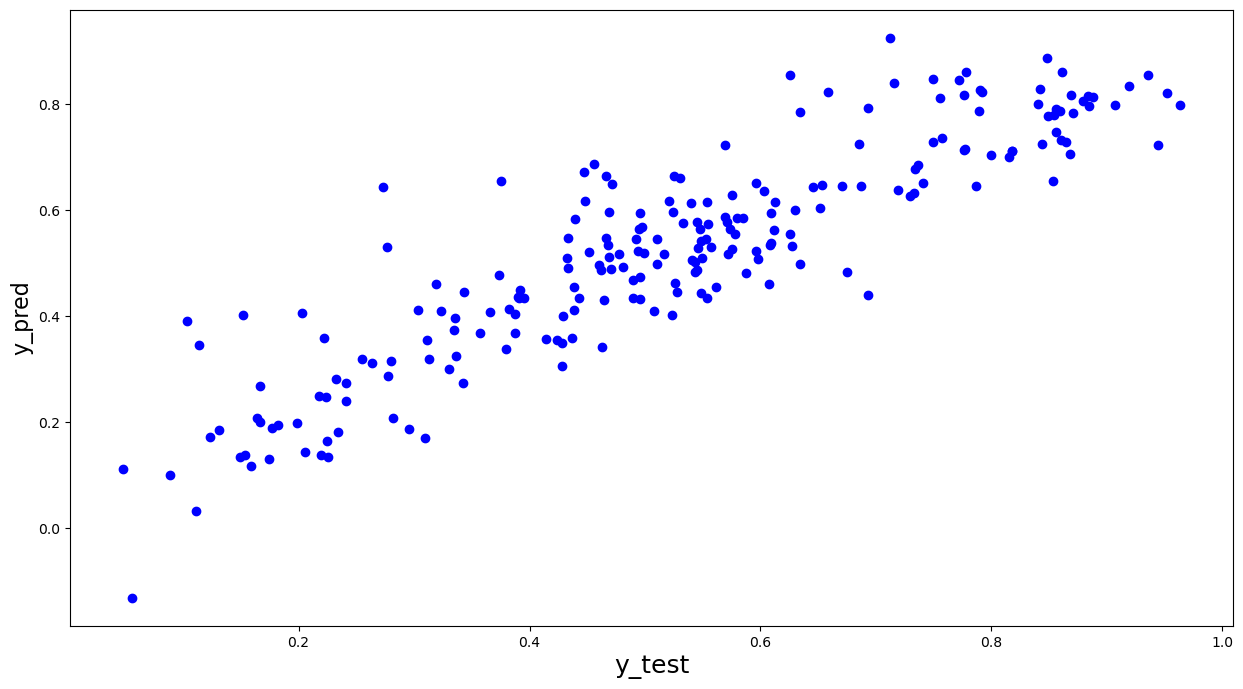

In [611]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_test_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:

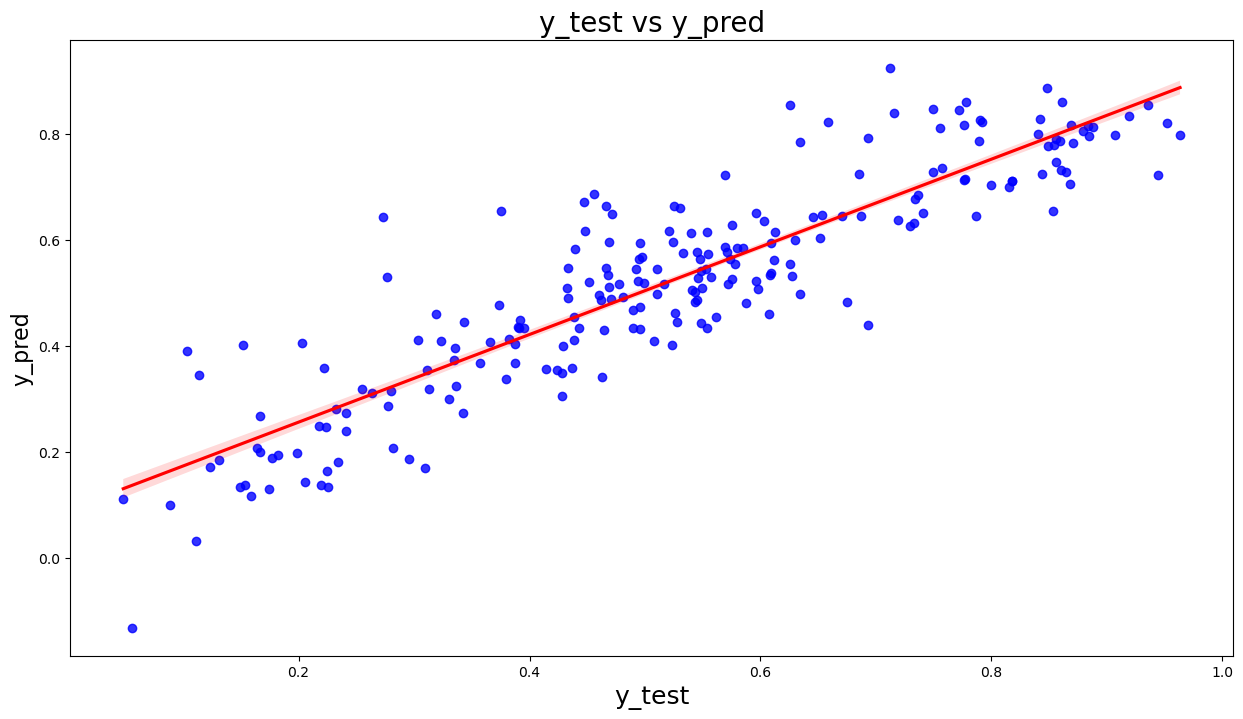

In [612]:
#Regression plot

plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [613]:
round(lr.params,4)

const             0.0750
Sep               0.0974
Sat               0.0675
Moderate/Misty   -0.0800
Bad/LightRain    -0.2871
Summer            0.0886
Winter            0.1307
yr                0.2331
workingday        0.0561
temp              0.5499
windspeed        -0.1552
dtype: float64

We can see that the equation of our best fitted line is:

 - count = `0.0974` x September + `0.0675` x Saturday - `0.0800` x Moderate/Misty - `0.2871` x Bad/LightRain +` 0.0886` x Summer + `0.1307` x Winter + `0.2331` x Year + `0.0561` x workingday + `0.5499` x temp - `0.1552` x windspeed

In [614]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7864


### Final Result Comparison between Train model and Test:

##### - Train R^2 : 0.835

##### - Train Adjusted R^2 : 0.832

##### - Test R^2: 0.796

##### - Test Adjusted R^2: 0.786

### Intrepretting the Model

In [615]:
# Final model for reference
cols = ['Sep', 'Sat', 'Moderate/Misty', 'Bad/LightRain', 'Summer',
        'Winter', 'yr', 'workingday', 'temp', 'windspeed']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Fri, 25 Aug 2023   Prob (F-statistic):          3.13e-188
Time:                        20:24:22   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0750      0.019      4.

##### - We arrived at a very decent model for the the demand for shared bikes with the significant variables

#### - We can see that temperature variable is having the highest coefficient `0.5499`, which means if the temperature increases by one unit the number of bike rentals increases by `0.5499` units.

##### Similary we can see coefficients of other variables in the equation for best fitted line.

##### We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have `Moderate/Misty`, `Bad/LightRain` and `windspeed` variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

#### Business Goals:

#### Analysing the above model, the company should focus on the following feature

##### - BoomBikes must focus more on Temperature as we see increase in bike rentals.

##### - We can see demand for bikes was more in 2019 than 2018, since there is an increase in 2019 which was post pandemic, things will get better

##### - Can focus more on Summer & Winter season, September month, Weekends especially on Saturday, Working days as they have good influence on bike rentals.

##### - We can see windspeed has negative coefficients and negatively correlated to bike rentals. So the company can give some offers to increase the demand.

##### - Now seeing to weathersit variable, we have gotten negative coefficients for Bad/LightRain and Moderate/Misty weather. And this could be better opportunity to present offers.

#### Conclusion
- Significant variables to predict the demand for shared bikes
    - workingday
    - temp
    - Season - Summer
    - months - September
    - Year - 2019
    - weekday - Saturday
    - weathersit - Bad/LightRain, Moderate/Misty
    - windspeed